In [1]:
# Import libraries
import os
import sys

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statistics
import datetime as dt

In [2]:
# Check virtual environment: should be: '/Users/James/anaconda3/envs/mimic/bin/python'
sys.executable

'/Users/James/anaconda3/envs/mimic/bin/python'

In [3]:
# Set up paths
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
src_folder = os.path.join(project_root, 'src')

src_preparation_folder = os.path.join(src_folder, 'preparation')
src_processing_folder = os.path.join(src_folder, 'processing')

In [4]:
# Import src functions
sys.path.insert(0, src_preparation_folder)
from import_data import get_table
from import_data import get_patient_admissions_diagnoses
from import_data import get_admission_data
from extract_codes import find_ndc_codes

sys.path.insert(0, src_processing_folder)
from stats import plot_KDE
from stats import plot_perc_bar_chart
from stats import compare_groups

In [5]:
# Get subjects that were diagnoses with Alzheimers
subjects = get_table(host = 'localhost',
                  dbname = 'mimic',
                  schema = 'mimiciii',
                  table = 'diagnoses_icd',
                  columns = 'DISTINCT subject_id',
                  where = "icd9_code ='3310'").subject_id.tolist()
print(len(subjects))

503


In [6]:
# Get a random sample of patients (not in original subject list)
base = get_table(host = 'localhost',
                  dbname = 'mimic',
                  schema = 'mimiciii',
                  table = 'patients',
                  columns = 'DISTINCT subject_id',
                  where = "subject_id NOT IN {} AND subject_id > 0".format(tuple(set(subjects)))).subject_id.tolist()
print(len(base))
base = [base[i] for i in sorted(random.sample(range(len(base)), 20000))]
len(base)

46017


20000

In [7]:
# Get patient, admission and diagnosis data for these subjects
group = get_patient_admissions_diagnoses(subjects)
print(group.shape)

base_group = get_patient_admissions_diagnoses(base)
print(base_group.shape)

(9822, 21)
(279443, 21)


In [8]:
# --- Create lists of admissions to compare in each group

# From subjects keep only cases where it was their first admission and they were diagnosed with Alz on this admission
subject_adm = group[(group['admission_number'] == 1) & (group['diagnosis_icd9'] == '3310')].hadm_id.unique().tolist()
print(len(subject_adm))

# Keep only first admissions of base group, and remove newborns
base_adm = base_group[(base_group['admission_number'] == 1)
                      & (base_group['admission_type'] != 'NEWBORN')].hadm_id.unique().tolist()
print(len(base_adm))

450
16565


/Users/James/Desktop/YourMD/machine_learning/mimic/src/processing/stats.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.dropna(inplace=True)


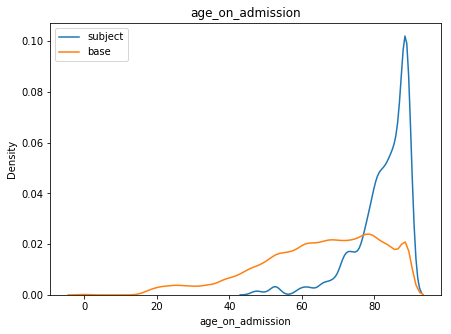

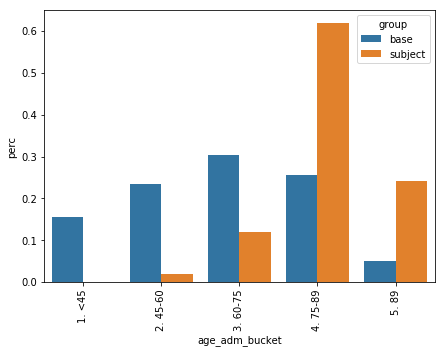

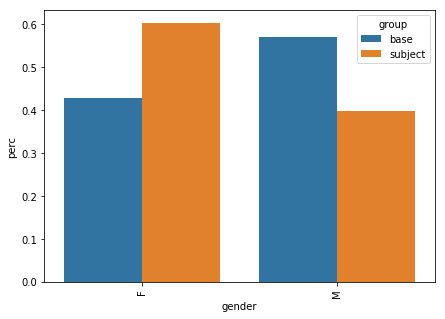

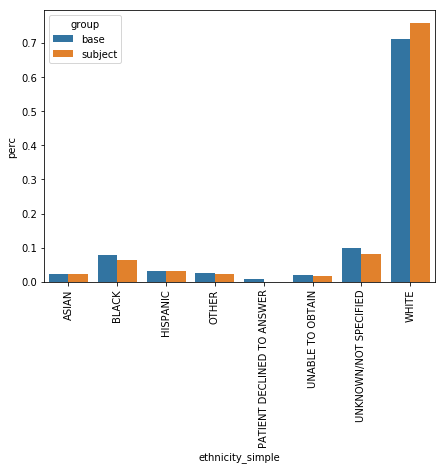

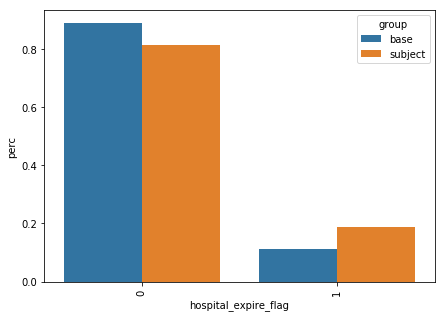

subject_id    group gender  age_on_admission age_adm_bucket  \
0            72402  subject      M                79       4. 75-89   
1            72402  subject      M                79       4. 75-89   
2            72402  subject      M                79       4. 75-89   
3            72402  subject      M                79       4. 75-89   
4            72402  subject      M                79       4. 75-89   
5            72402  subject      M                79       4. 75-89   
6            72402  subject      M                79       4. 75-89   
7            72402  subject      M                79       4. 75-89   
8            72402  subject      M                79       4. 75-89   
9            72402  subject      M                79       4. 75-89   
10           72402  subject      M                79       4. 75-89   
11           72402  subject      M                79       4. 75-89   
12           72402  subject      M                79       4. 75-89   
13           72402  subject      M                79       4. 75-89   
14           72402  subject      M                79       4. 75-89   
15           72402  subject      M                79       4. 75-89   
16           72402  subject      M                79       4. 75-89   
17           72402  subject      M                79       4. 75-89   
18           72402  subject      M                79       4. 75-89   
19           72402  subject      M                79       4. 75-89   
20           72402  subject      M                79       4. 75-89   
21           72402  subject      M                79       4. 75-89   
22           72402  subject      M                79       4. 75-89   
23           72402  subject      M                79       4. 75-89   
24           72402  subject      M                79       4. 75-89   
25           72402  subject      M                79       4. 75-89   
26           72402  subject      M                79       4. 75-89   
27           72402  subject      M                79       4. 75-89   
28           72402  subject      M                79       4. 75-89   
29           72402  subject      M                79       4. 75-89   
...            ...      ...    ...               ...            ...   
183805       17681     base      M                84       4. 75-89   
183806       90521     base      F                84       4. 75-89   
183807       90521     base      F                84       4. 75-89   
183808       90521     base      F                84       4. 75-89   
183809       90521     base      F                84       4. 75-89   
183810       90521     base      F                84       4. 75-89   
183811       90521     base      F                84       4. 75-89   
183812       90521     base      F                84       4. 75-89   
183813       90521     base      F                84       4. 75-89   
183814       90521     base      F                84       4. 75-89   
183815       90521     base      F                84       4. 75-89   
183816       90521     base      F                84       4. 75-89   
183817       90521     base      F                84       4. 75-89   
183818       90521     base      F                84       4. 75-89   
183819       90521     base      F                84       4. 75-89   
183820       90521     base      F                84       4. 75-89   
183821       90521     base      F                84       4. 75-89   
183822       90521     base      F                84       4. 75-89   
183823       52389     base      M                62       3. 60-75   
183824       52389     base      M                62       3. 60-75   
183825       52389     base      M                62       3. 60-75   
183826       52389     base      M                62       3. 60-75   
183827       52389     base      M                62       3. 60-75   
183828       52389     base      M                62       3. 60-75   
183829       52389     base     

In [9]:
# Compare the two populations
compare_groups(subjects=subject_adm, base=base_adm)

312
4200


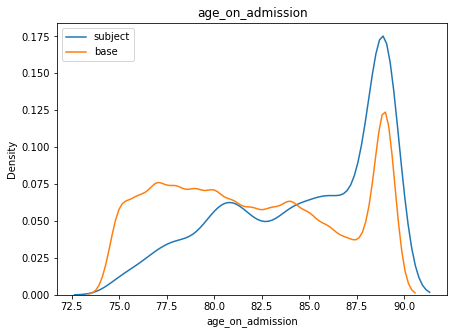

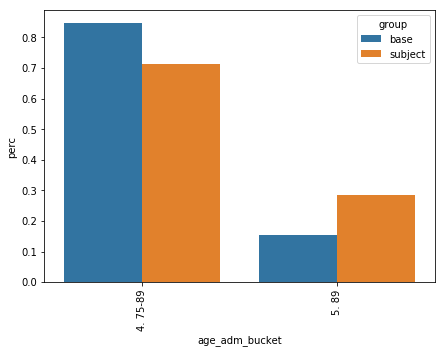

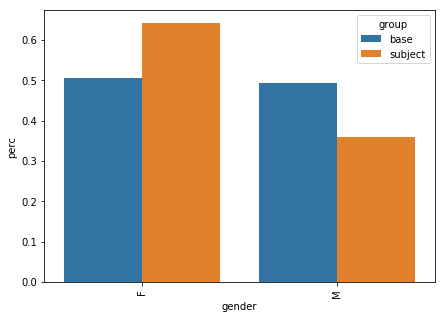

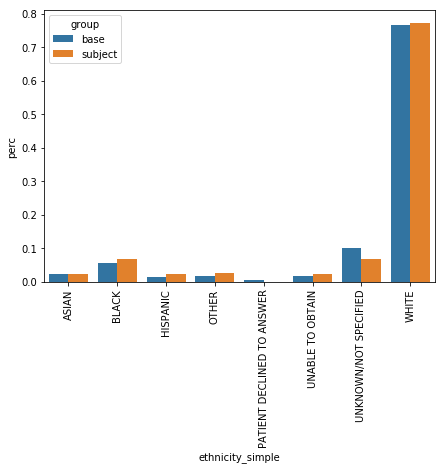

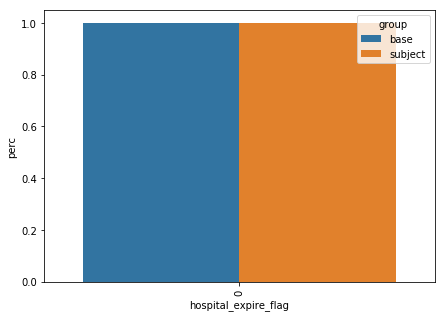

subject_id    group gender  age_on_admission age_adm_bucket ethnicity  \
0           24731  subject      F                81       4. 75-89     WHITE   
1           24731  subject      F                81       4. 75-89     WHITE   
2           24731  subject      F                81       4. 75-89     WHITE   
3           24731  subject      F                81       4. 75-89     WHITE   
4           24731  subject      F                81       4. 75-89     WHITE   
5           24731  subject      F                81       4. 75-89     WHITE   
6           24731  subject      F                81       4. 75-89     WHITE   
7           24731  subject      F                81       4. 75-89     WHITE   
8           24731  subject      F                81       4. 75-89     WHITE   
9           24731  subject      F                81       4. 75-89     WHITE   
10          24731  subject      F                81       4. 75-89     WHITE   
11          24731  subject      F                81       4. 75-89     WHITE   
12          24731  subject      F                81       4. 75-89     WHITE   
13          24731  subject      F                81       4. 75-89     WHITE   
14          24731  subject      F                81       4. 75-89     WHITE   
15          24731  subject      F                81       4. 75-89     WHITE   
16           2708  subject      F                89          5. 89     WHITE   
17           2708  subject      F                89          5. 89     WHITE   
18           2708  subject      F                89          5. 89     WHITE   
19           2708  subject      F                89          5. 89     WHITE   
20           2708  subject      F                89          5. 89     WHITE   
21           2708  subject      F                89          5. 89     WHITE   
22           2708  subject      F                89          5. 89     WHITE   
23           2708  subject      F                89          5. 89     WHITE   
24           2708  subject      F                89          5. 89     WHITE   
25           2708  subject      F                89          5. 89     WHITE   
26           2708  subject      F                89          5. 89     WHITE   
27           2708  subject      F                89          5. 89     WHITE   
28           2708  subject      F                89          5. 89     WHITE   
29           2708  subject      F                89          5. 89     WHITE   
...           ...      ...    ...               ...            ...       ...   
51135       90521     base      F                84       4. 75-89     WHITE   
51136       90521     base      F                84       4. 75-89     WHITE   
51137       90521     base      F                84       4. 75-89     WHITE   
51138       63298     base      F                83       4. 75-89     WHITE   
51139       63298     base      F                83       4. 75-89     WHITE   
51140       63298     base      F                83       4. 75-89     WHITE   
51141       63298     base      F                83       4. 75-89     WHITE   
51142       63298     base      F                83       4. 75-89     WHITE   
51143       63298     base      F                83       4. 75-89     WHITE   
51144       63298     base      F                83       4. 75-89     WHITE   
51145       63298     base      F                83       4. 75-89     WHITE   
51146       63298     base      F                83       4. 75-89     WHITE   
51147       63298     base      F                83       4. 75-89     WHITE   
51148       63298     base      F                83       4. 75-89     WHITE   
51149       63298     base      F                83       4. 75-89     WHITE   
51150       63298     base      F                83       4. 75-89     WHITE   
51151       79349     base      F                89          5. 89     WHITE   
51152       79349     base      F                89          5. 89     WHITE   
51153  

In [10]:
# To crudely make the samles more similar, only accept patients from both groups who are >= 75, then re-compare
# Adittionally, remove all patients who died in order for a final reading of vital signs to be taken

# From subjects keep only cases where it was their first admission and they were diagnosed with Alz on this admission
subject_adm = group[(group['admission_number'] == 1)
                    & (group['diagnosis_icd9'] == '3310')
                    & (group['age_on_admission'] >= 75)
                    & (group['hospital_expire_flag'] == 0)].hadm_id.unique().tolist()
print(len(subject_adm))

# Keep only first admissions of base group, and remove newborns
base_adm = base_group[(base_group['admission_number'] == 1)
                      & (base_group['admission_type'] != 'NEWBORN')
                      & (base_group['age_on_admission'] >= 75)
                      & (base_group['hospital_expire_flag'] == 0)].hadm_id.unique().tolist()
print(len(base_adm))

compare_groups(subjects=subject_adm, base=base_adm)

## Take the final measurement of each vital sign for patients in each admission group

In [19]:
import psycopg2 as p
def get_chartevents(host, dbname, admissions):

    '''
    Function for importing chartevents for a list of admissions

    '''

    # Select DB location
    con = p.connect("host={} dbname={}".format(host, dbname))
    cur = con.cursor()
    
    admissions=tuple(set(admissions))

    # Execute query
    cur.execute("SELECT\
                    a.subject_id\
                    ,a.hadm_id\
                    ,a.itemid\
                    ,b.valuenum\
                FROM\
                    ((SELECT subject_id\
                            ,hadm_id\
                            ,itemid\
                            ,MAX(charttime) AS reading_time\
                    FROM mimiciii.chartevents\
                    WHERE hadm_id IN {}\
                    GROUP BY 1,2,3) a\
                    LEFT JOIN\
                    (SELECT hadm_id\
                            ,itemid\
                            ,charttime\
                            ,valuenum\
                    FROM mimiciii.chartevents) b\
                    ON a.hadm_id = b.hadm_id AND a.itemid = b.itemid AND a.reading_time = b.charttime)\
                WHERE valuenum IS NOT null".format(admissions))

    if cur.rowcount > 0:
        # Get rows and column names
        rows=cur.fetchall()
        column_names = [desc[0] for desc in cur.description]

        # Create DataFrame
        df = pd.DataFrame(rows)
        df.columns = column_names

        # De-Dupe
        df.drop_duplicates(inplace=True)

        return df
    else:
        print('No rows returned')

In [20]:
test = get_chartevents(host = 'localhost',
                      dbname = 'mimic',
                      admissions = subject_adm)

In [22]:
test.head()

subject_id  hadm_id  itemid  valuenum
0       19052   100199      51  170.0000
1       19052   100199      52  110.0000
2       19052   100199      87   14.0000
3       19052   100199     114   12.1764
4       19052   100199     184    4.0000